<a href="https://colab.research.google.com/github/Ayushverma135/Smart-India-Hackathon-24/blob/main/path_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dijisktra's Algorithm and spline smoothness map matching

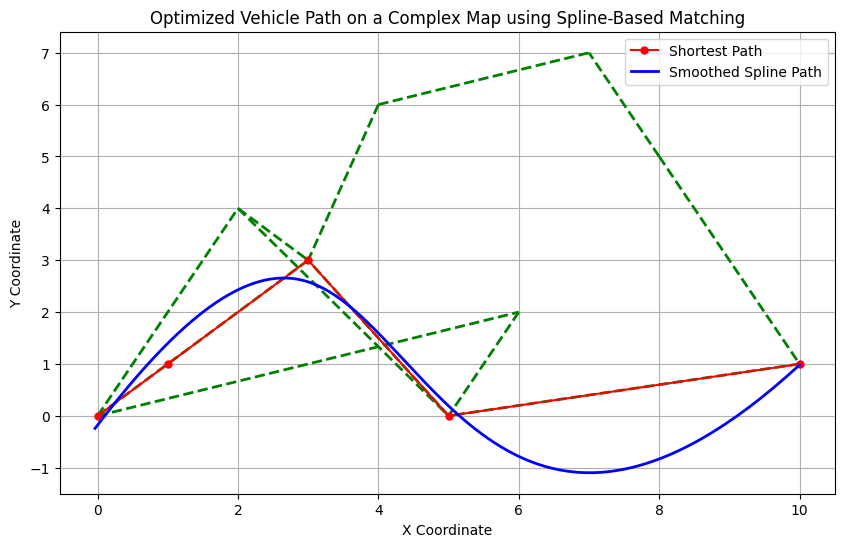

In [ ]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
import networkx as nx
from geopy.distance import geodesic

# Define a more complex road network
G = nx.Graph()

# Define nodes (intersections)
nodes = {
    'A': (0, 0),
    'B': (2, 4),
    'C': (4, 6),
    'D': (6, 2),
    'E': (8, 5),
    'F': (10, 1),
    'G': (5, 0),
    'H': (3, 3),
    'I': (7, 7),
    'J': (1, 1)
}

# Add nodes to the graph
for node, coord in nodes.items():
    G.add_node(node, pos=coord)

# Define edges (roads) with weights (distances)
edges = [
    ('A', 'B', geodesic(nodes['A'], nodes['B']).meters),
    ('A', 'J', geodesic(nodes['A'], nodes['J']).meters),
    ('J', 'H', geodesic(nodes['J'], nodes['H']).meters),
    ('B', 'H', geodesic(nodes['B'], nodes['H']).meters),
    ('H', 'C', geodesic(nodes['H'], nodes['C']).meters),
    ('C', 'I', geodesic(nodes['C'], nodes['I']).meters),
    ('I', 'E', geodesic(nodes['I'], nodes['E']).meters),
    ('E', 'F', geodesic(nodes['E'], nodes['F']).meters),
    ('F', 'G', geodesic(nodes['F'], nodes['G']).meters),
    ('G', 'D', geodesic(nodes['G'], nodes['D']).meters),
    ('D', 'A', geodesic(nodes['D'], nodes['A']).meters),
    ('G', 'B', geodesic(nodes['G'], nodes['B']).meters),
    ('H', 'G', geodesic(nodes['H'], nodes['G']).meters)
]

# Add edges to the graph
G.add_weighted_edges_from(edges)

# Define source and destination
source = 'A'
destination = 'F'

# Find the shortest path using Dijkstra's algorithm
shortest_path = nx.dijkstra_path(G, source, destination, weight='weight')
path_coords = [nodes[node] for node in shortest_path]

# Extract x and y coordinates from the path
x_coords, y_coords = zip(*path_coords)

# Fit a spline to the path
tck, u = splprep([x_coords, y_coords], s=0.5)  # Adjust `s` for desired smoothness
u_fine = np.linspace(0, 1, 200)
x_smooth, y_smooth = splev(u_fine, tck)

# Plot the road network and the optimized path
plt.figure(figsize=(10, 6))

# Plot road network
for edge in G.edges:
    node1, node2 = edge
    x1, y1 = G.nodes[node1]['pos']
    x2, y2 = G.nodes[node2]['pos']
    plt.plot([x1, x2], [y1, y2], 'g--', lw=2)

# Plot shortest path (raw)
plt.plot(x_coords, y_coords, 'ro-', label='Shortest Path', markersize=5)

# Plot smoothed path
plt.plot(x_smooth, y_smooth, 'b-', label='Smoothed Spline Path', lw=2)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Optimized Vehicle Path on a Complex Map using Spline-Based Matching')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# !pip install folium geopy networkx
!pip install osmnx

# Shortest path between cities using dijikstra's algorithm

In [ ]:
import folium
import networkx as nx
from geopy.distance import geodesic
import numpy as np  # Import numpy for array operations

# Define the road network and coordinates with real-life locations in Rajasthan
nodes = {
    'A': (26.9124, 75.7873),  # Jaipur
    'B': (27.0238, 74.2176),  # Ajmer
    'C': (26.4858, 80.2327),  # Lucknow
    'D': (26.8500, 80.9498),  # Kanpur
    'E': (27.2108, 77.4900),  # Aligarh
    'F': (28.7041, 77.1025),  # Delhi
    'G': (25.2820, 82.9676),  # Varanasi
    'H': (26.8467, 80.9462),  # Lucknow (same as C, just to show multiple paths)
    'I': (28.5674, 77.2090),  # Noida
    'J': (27.0238, 74.2176)   # Ajmer (repeated for connection)
}

# Create a new graph
G = nx.Graph()

# Add nodes to the graph
for node, coord in nodes.items():
    G.add_node(node, pos=coord)

# Define and add edges with distances
edges = [
    ('A', 'B', geodesic(nodes['A'], nodes['B']).meters),
    ('A', 'J', geodesic(nodes['A'], nodes['J']).meters),
    ('J', 'H', geodesic(nodes['J'], nodes['H']).meters),
    ('B', 'H', geodesic(nodes['B'], nodes['H']).meters),
    ('H', 'C', geodesic(nodes['H'], nodes['C']).meters),
    ('C', 'I', geodesic(nodes['C'], nodes['I']).meters),
    ('I', 'E', geodesic(nodes['I'], nodes['E']).meters),
    ('E', 'F', geodesic(nodes['E'], nodes['F']).meters),
    ('F', 'G', geodesic(nodes['F'], nodes['G']).meters),
    ('G', 'D', geodesic(nodes['G'], nodes['D']).meters),
    ('D', 'A', geodesic(nodes['D'], nodes['A']).meters),
    ('G', 'B', geodesic(nodes['G'], nodes['B']).meters),
    ('H', 'G', geodesic(nodes['H'], nodes['G']).meters)
]

G.add_weighted_edges_from(edges)

# Define source and destination
source = 'A'  # Jaipur
destination = 'F'  # Delhi

# Find the shortest path
shortest_path = nx.dijkstra_path(G, source, destination, weight='weight')

# Convert node coordinates for plotting
path_coords = [nodes[node] for node in shortest_path]

# Create a Folium map centered at the midpoint of the first and last nodes
m = folium.Map(location=np.mean([nodes[source], nodes[destination]], axis=0), zoom_start=7, tiles='OpenStreetMap')

# Add the shortest path to the map
folium.PolyLine(locations=path_coords, color='blue', weight=5, opacity=0.7).add_to(m)

# Add markers for the start and end points
folium.Marker(location=nodes[source], popup=f'Start: {source}', icon=folium.Icon(color='green')).add_to(m)
folium.Marker(location=nodes[destination], popup=f'End: {destination}', icon=folium.Icon(color='red')).add_to(m)

# Display the map
m.save('optimized_vehicle_path.html')

In [ ]:


# import folium
# import networkx as nx
# import osmnx as ox
# from geopy.distance import geodesic
# import numpy as np

# # Define a smaller bounding box for Jaipur
# north, south, east, west = 27.1, 26.7, 75.9, 75.6

# # Fetch the road network for the bounding box
# G = ox.graph_from_bbox(north, south, east, west, network_type='all')

# # Define the source and destination
# source_coords = (26.9124, 75.7873)  # Jaipur
# destination_coords = (28.7041, 77.1025)  # Delhi

# # Find the nearest nodes to the source and destination
# source_node = ox.distance.nearest_nodes(G, source_coords[1], source_coords[0])
# destination_node = ox.distance.nearest_nodes(G, destination_coords[1], destination_coords[0])

# # Find the shortest path using A* algorithm
# shortest_path = nx.astar_path(G, source_node, destination_node, weight='length')

# # Convert node coordinates for plotting
# path_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_path]

# # Create a Folium map centered at the midpoint of the source and destination
# m = folium.Map(location=np.mean([source_coords, destination_coords], axis=0), zoom_start=10, tiles='OpenStreetMap')

# # Add the shortest path to the map
# folium.PolyLine(locations=path_coords, color='blue', weight=5, opacity=0.7).add_to(m)

# # Add markers for the start and end points
# folium.Marker(location=source_coords, popup=f'Start: Jaipur', icon=folium.Icon(color='green')).add_to(m)
# folium.Marker(location=destination_coords, popup=f'End: Delhi', icon=folium.Icon(color='red')).add_to(m)

# # Display the map
# m.save('optimized_vehicle_path_with_highways.html')

<ipython-input-1-69e20739c792>:79: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='all')
<ipython-input-1-69e20739c792>:79: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type='all')


In [ ]:
import folium
import networkx as nx
import osmnx as ox
import numpy as np
from geopy.distance import geodesic

# Define a smaller bounding box for the area of interest
north, south, east, west = 27.2, 26.7, 76.1, 75.5  # Smaller area around Jaipur

# Fetch the road network from OpenStreetMap for the bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type='all')

# Optionally simplify the graph if it's not already simplified
if "simplified" not in G.graph:
    G = ox.simplify_graph(G)

# Define the source and destination coordinates within the area
source_coords = (26.9124, 75.7873)  # Example: Jaipur
destination_coords = (27.0238, 74.2176)  # Example: Jodhpur

# Find the nearest nodes to the source and destination
source_node = ox.distance.nearest_nodes(G, source_coords[1], source_coords[0])
destination_node = ox.distance.nearest_nodes(G, destination_coords[1], destination_coords[0])

# Find the shortest path using Dijkstra's algorithm
shortest_path = nx.dijkstra_path(G, source_node, destination_node, weight='length')

# Convert node coordinates for plotting
path_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_path]

# Create a Folium map centered at the midpoint of the source and destination
m = folium.Map(location=np.mean([source_coords, destination_coords], axis=0), zoom_start=10, tiles='Stamen Terrain')

# Add the shortest path to the map
folium.PolyLine(locations=path_coords, color='blue', weight=5, opacity=0.7).add_to(m)

# Add markers for the start and end points
folium.Marker(location=source_coords, popup=f'Start: Jaipur', icon=folium.Icon(color='green')).add_to(m)
folium.Marker(location=destination_coords, popup=f'End: Jodhpur', icon=folium.Icon(color='red')).add_to(m)

# Display the map
m.save('dijkstra_path_optimized.html')
